# Bayesian regression

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Question 1
>Let us consider the Bayesian regression model
$$y = \Phi_x w + \epsilon,$$
where $w \sim \mathcal N(0, \alpha^{-1} I_2)$ and $\epsilon | w \sim \mathcal N(0, \beta^{-1} I_n)$, with $\alpha=0.1$, $\beta=5$, $n=2$.
Here, for $i = 1, \dots, n$, the $i^\text{th}$ row of $\Phi_x$ is $\phi(x_i) = [\sin(x_i), 1]$, where $x_1, \dots, x_n \overset{i.i.d.}{\sim} \mathcal U([0, 2\pi])$.
>
>Write a function `phi(x)` that returns $\Phi_x$ for `x=`$(x_1, \dots, x_n)$.

In [6]:
# Answer
def phi(x):
    
    phi = np.sin(x)
    
    phi = np.vstack((phi, np.ones(x.shape[0])))
    
    return phi
    
    
                

## Question 2
> Sample $y$ according to the Bayesian model described previously.
Plot the on the same figure:
>1. the graph of the function $x' \in [0, 2\pi] \mapsto \phi(x')w$;
>1. the observations $y_1, \dots, y_n$ against $x_1, \dots, x_n$.

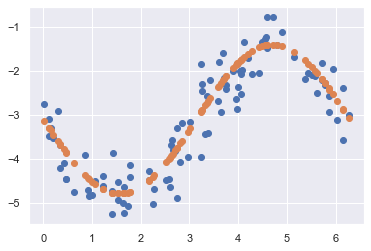

In [23]:
# Answer
def sample():
    x = np.random.uniform(0,2*np.pi, 100)
    w = np.random.normal(loc = 0, scale = (1/np.sqrt(0.1)), size = 2)
    a = phi(x).T@w
    y = a + np.random.normal(0,1/np.sqrt(5),x.shape[0])
    return x,y,a

x,y,phi_w = sample()


fig, ax = plt.subplots()
ax.scatter(x,y)
ax.scatter(x, phi_w)

## Question 3
>Compute the Bayesian estimator/predictor $x_{\mathrm{new}} \mapsto \hat{y}^{\mathcal{D}}(x_{\mathrm{new}})$.

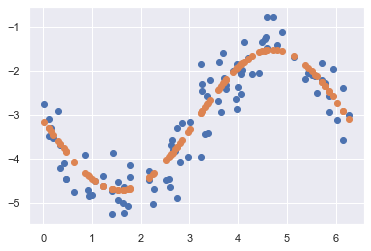

In [40]:
# Answer
alpha = 0.1
s_0 = alpha*np.eye(2)
s_0_inv = np.linalg.inv(s_0)
beta = 5
s_n = np.linalg.inv(s_0_inv + (beta*(phi(x))@phi(x).T))

posterior_mean = s_n@(beta*phi(x)@y)
posterior_mean
y_pred = phi(x).T@posterior_mean


fig, ax = plt.subplots()
ax.scatter(x,y)
ax.scatter(x, y_pred)

## Question 4
>Compute the standard deviation $\sigma_N(x_\text{new})$ of $y_\text{new} | x_\text{new}$ and illustrate the predictive uncertainty by plotting a shaded region, that spans $\sigma_N(x')$ either side of $\hat{y}^{\mathcal{D}}(x')$.

In [5]:
# Answer